# Preface:
This program takes brake system test data from Brake_Evac_and_Fill_Data.csv and makes scatter plots comparing
certain tests against their specification limits using the pandas, matplotlib, and seaborn libraries. 
This work was originally done with an Excel macro, but Excel took 30 minutes to process a similar spreadsheet, while Python
processed it near instantaneously.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Import brake test data from CSV
data = pd.read_csv(r'C:\\Users\\lange\\Documents\\VIN Program\\Brake_Evac_and_Fill_Data.csv')
data.head()

,VIN,Machines,Date,Time,Production Date,Measurement Type,Measurement,High Spec,Low Spec,Styles,...,Model,Model Year,I_PRODCT_TAG,Vacuum Decay,Vacuum,Leak Chk,Stabilize,Stroke 2,Stroke 1,Pick-Up
0,1C6RREBG5LN276516,S1,2/6/2020,10:29 PM,2/6/2020,Overall Problem,0,0,0,1,...,DT1H41,2020,42636704,0.04,15.54,0.014,0.020,4.372,3.057,0.858
1,1C6RREBG5LN288780,S1,2/6/2020,7:00 PM,2/6/2020,Overall Problem,0,0,0,1,...,DT1H41,2020,42635490,0.05,15.67,0.013,0.021,4.523,3.115,0.954
2,1C6RREBG6LN267369,S1,2/6/2020,9:59 AM,2/6/2020,Overall Problem,0,0,0,1,...,DT1H41,2020,42610964,0.04,15.69,0.013,0.020,4.548,3.198,0.871
3,1C6RREBG6LN278355,S1,2/7/2020,10:54 AM,2/7/2020,Overall Problem,0,0,0,1,...,DT1H41,2020,42645440,0.07,15.27,0.019,0.093,4.491,2.809,0.822
4,1C6RREBG6LN289260,S1,2/8/2020,5:43 PM,2/8/2020,Overall Problem,0,0,0,1,...,DT1H41,2020,26687426,0.04,15.76,0.018,0.041,4.607,3.141,0.868


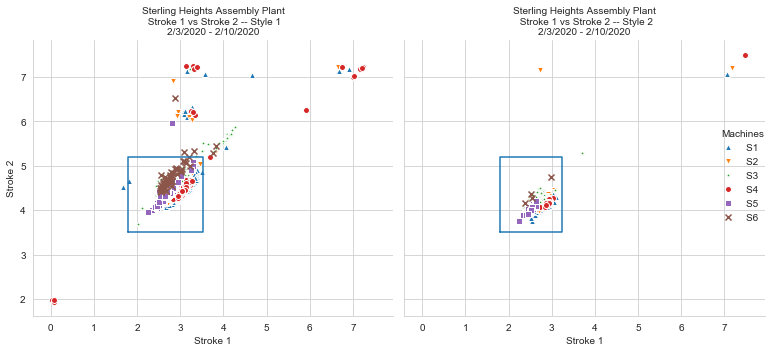

In [6]:
#Create Scatterplots of stroke 1 vs stroke 2 data by style, with the Machines used denoted by the legend
g = sns.FacetGrid(data, col="Styles", hue="Machines", height=5, hue_kws=dict(marker=["^", "v", '*', 'o', 's', 'x']))
g = (g.map(plt.scatter, "Stroke 1", "Stroke 2", edgecolor="w").add_legend())
g.set_titles('Sterling Heights Assembly Plant\n Stroke 1 vs Stroke 2 -- Style {col_name}\n2/3/2020 - 2/10/2020')
sns.set_style("whitegrid")
plt.tight_layout()

#Define specification limits for stroke2/stroke1 tests and plot them
s1x_boundary_style_one = [1.8,1.8,3.53,3.53,1.8] #Spec for Stroke 1, Style 1 
s2y_boundary_style_one = [3.5,5.2,5.2,3.5,3.5] #Spec for Stroke 2, Style 1
s1x_boundary_style_two = [1.8,1.8,3.25,3.25,1.8] #Spec for Stroke 1, Style 2
s2y_boundary_style_two= [3.5,5.2,5.2,3.5,3.5] #Spec for Stroke 2, Style 2
ax = g.facet_axis(0, 0)
plt.plot(s1x_boundary_style_one, s2y_boundary_style_one)
ax2 = g.facet_axis(0, 1)
plt.plot(s1x_boundary_style_two, s2y_boundary_style_two)

plt.savefig("Stroke1 vs Stroke2.png")
plt.show()


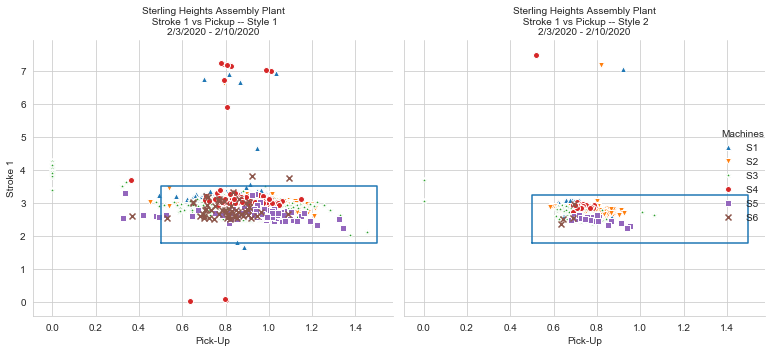

In [4]:
#Create Scatterplots of Pickup vs stroke 1 data by style, with the Machines used denoted by the legend
g = sns.FacetGrid(data, col="Styles", hue="Machines", height=5, hue_kws=dict(marker=["^", "v", '*', 'o', 's', 'x']))
g = (g.map(plt.scatter, "Pick-Up", "Stroke 1", edgecolor="w").add_legend())
g.set_titles('Sterling Heights Assembly Plant\n Stroke 1 vs Pickup -- Style {col_name}\n2/3/2020 - 2/10/2020')
sns.set_style("whitegrid")
plt.tight_layout()

#Define specification limits for pickup/stroke1 tests and plot them
pickupx_boundary_style_one = [0.5,0.5,1.5,1.5,0.5] #Spec for Pickup, Style 1
pickupx_boundary_style_two = [0.5,0.5,1.5,1.5,0.5] #Spec for Pickup, Style 2
s1y_boundary_style_one = [1.8,3.53,3.53,1.8,1.8] #Spec for Stroke 1, Style 1 
s1y_boundary_style_two = [1.8,3.25,3.25,1.8,1.8] #Spec for Stroke 1, Style 2

ax = g.facet_axis(0, 0)
plt.plot(pickupx_boundary_style_one, s1y_boundary_style_one)
ax2 = g.facet_axis(0, 1)
plt.plot(pickupx_boundary_style_two, s1y_boundary_style_two)

plt.savefig("Stroke 1 vs Pickup.png")
plt.show()

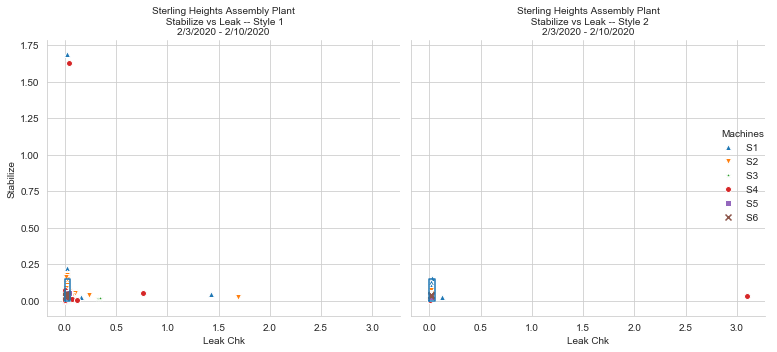

In [5]:
#Create Scatterplots of Leak vs Stabilize data by style, with the Machines used denoted by the legend
g = sns.FacetGrid(data, col="Styles", hue="Machines", height=5, hue_kws=dict(marker=["^", "v", '*', 'o', 's', 'x']))
g = (g.map(plt.scatter, "Leak Chk", "Stabilize", edgecolor="w").add_legend())
g.set_titles('Sterling Heights Assembly Plant\n Stabilize vs Leak -- Style {col_name}\n2/3/2020 - 2/10/2020')
sns.set_style("whitegrid")
plt.tight_layout()

#Define specification limits for pickup/stroke1 tests and plot them
Leak_boundary_style_one = [0,0,0.05,0.05,0] #Spec for Pickup, Style 1
Leak_boundary_style_two = [0,0,0.05,0.05,0] #Spec for Pickup, Style 2
Stabilize_boundary_style_one = [0,0.15,0.15,0,0] #Spec for Stroke 1, Style 1 
Stabilize_boundary_style_two = [0,0.15,0.15,0,0] #Spec for Stroke 1, Style 2

#Plot Boundaries and Redefine Axis Ticks for Clarity
ax = g.facet_axis(0, 0)
plt.plot(Leak_boundary_style_one, Stabilize_boundary_style_one)
ax2 = g.facet_axis(0, 1)
plt.plot(Leak_boundary_style_two, Stabilize_boundary_style_two)

plt.savefig("Stabilize vs Leak.png")
plt.show()